# Trabalho 2
---

## Especificações

O trabalho deve ser relizado em **duplas**.

### Entrega

Após responder todas as questões, vocês devem certificar que seu Notebook está salvo com suas alterações (basta pressionar `ctrl + s` para salvar). Após salvar suas alterações, vocês devem realizar a entrega na sala de entrega do Moodle. A entrega deve ser feita da seguinte maneira:
- Deve ser entregue um arquivo `zip` contendo este Notebook com as questões respondidas. O nome do arquivo deve seguir o padrão: `NomeSobrenome_NomeSobrenome.zip`
- **Apenas um aluno da dupla deve fazer a entrega.**


### Critérios de avaliação

Cada questão será avaliada de acordo com os seguintes critérios:
- Resolver o problema proposto: 70%
- Utilizar código vetorizado: 20%
- Escrever código simples e legível: 10%

---

## Enunciado

Este trabalho consiste em explorar um conjunto de dados de Doenças crônicas nos rins (arquivo `kindey_disease.csv`). O conjunto de dados é formado por 400 observações (instâncias) e contém o seguintes atributos:

|Atributo|Tipo|Categorias|Descrição|
|:--|:--|:--|:--|
|`id`|Numérico (Único)|-|Unique identifier|
|`age`|Numérico|-|Age, in years|
|`bp`|Numérico|-|Blood pressure (mm/Hg)|
|`sg`|Categórico|1.005, 1.010, 1.015, 1.020, 1.025|Specific Gravity|
|`al`|Categórico|0, 1, 2, 3, 4, 5|Albumin|
|`su`|Categórico|0, 1, 2, 3, 4, 5|Sugar|
|`rbc`|Categórico|normal, abnormal|Red blood cells|
|`pc`|Categórico|normal, abnormal|Pus cell|
|`pcc`|Categórico|present, notpresent|Pus cell clumps|
|`ba`|Categórico|present, notpresent|Bacteria|
|`bgr`|Numérico|-|Blood glucose random (mgs/dl)|
|`bu`|Numérico|-|Blood urea (mgs/dl)|
|`sc`|Numérico|-|Serum Creatinine (mgs/dl)|
|`sod`|Numérico|-|Sodium (mEq/L)|
|`pot`|Numérico|-|Potassium (mEq/L)|
|`hemo`|Numérico|-|Hemoglobin (gms)|
|`pcv`|Numérico|-|Packed cell volume|
|`wc`|Numérico|-|White blood cell count (cells/cmm)|
|`rc`|Numérico|-|Red blood cell count (millions/cmm)|
|`htn`|Categórico|yes, no|Hypertension|
|`dm`|Categórico|yes, no|Diabetes Mellitus|
|`cad`|Categórico|yes, no|Coronary artery disease|
|`appet`|Categórico|good, poor|Appetite|
|`pe`|Categórico|yes, no|Pedal edema|
|`ane`|Categórico|yes, no|Anemia|
|`classification`|Categórico|ckd, notckd|Classification|


Nas células abaixo, existem questões específicas sobre o conjunto de dados que devem ser respondidas.

**Não é permitido importar nenhum módulo além dos que estão importados na célula abaixo.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display as print_dataframe

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Questão 1 (3.0 pts)

Leia o arquivo `kidney_disease.csv` e realize as seguintes operações de limpeza de dados:
1. Remova as colunas `id` e `sg`.
1. Remova todas as instâncias do conjunto de dados onde o o valor da coluna `rbc` estiver vazio.
1. Renomeie as colunas, de forma a deixar mais claro o que cada coluna significa (e.g., renomear `bp` para `blood_pressure`). Se baseie nas informações sobre os atributos, disponibilizadas acima.
1. Imprima o número de valores faltantes para **cada um** dos atributos. Estes valores devem estar em **percentual** e devem estar ordenados de maneira **decrescente**.
1. Preencha os valores faltantes dos atributos **numéricos** com a **média** da respectiva coluna.
1. Preencha os valores faltantes dos atributos **categóricos** com a **moda** (elemento mais frequente) da respectiva coluna.

In [2]:
########################
# Inicio do seu codigo #
########################

file = 'kidney_disease.csv'
df = pd.read_csv(file)

pd.set_option('display.max_columns', None)

# 1
df.drop(columns=['id', 'sg'], inplace=True)

# 2
df.dropna(subset=['rbc'], inplace=True)

# 3
df.rename(columns={'bp': 'blood_pressure', 'al': 'albumin', \
                   'su': 'sugar', 'rbc': 'red_blood_cells', \
                   'pc': 'pus_cell', 'pcc': 'pus_cell_clumps', \
                   'ba': 'bacteria', 'bgr': 'blood_glucose_random', \
                   'bu': 'blood_urea', 'sc': 'serum_creatinine', \
                   'sod': 'sodium', 'pot': 'potassium', \
                   'hemo': 'hemogloblin', 'pcv': 'packed_cell_volume', \
                   'wc': 'white_blood_cell_count', 'rc': 'red_blood_cell_count', \
                   'htn': 'hypertension', 'dm': 'diabetes_mellitus', \
                   'cad': 'coronary_artery_disease', 'appet': 'appetite', \
                   'pe': 'pedal_edema', 'ane': 'anemia'}, inplace=True)

# 4
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100)

# 5
remove_cols = ['albumin', 'sugar']
num_cols = [c for c in df.select_dtypes(['int', 'float']).columns.tolist() if c not in remove_cols]
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# 6
cat_cols = [c for c in df.columns.tolist() if c not in num_cols]
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

########################
#   Fim do seu codigo  #
########################

red_blood_cell_count       19.758065
white_blood_cell_count     15.322581
sodium                     13.306452
potassium                  13.306452
blood_glucose_random        9.274194
packed_cell_volume          9.274194
hemogloblin                 8.870968
blood_urea                  5.241935
serum_creatinine            4.032258
pus_cell                    3.629032
blood_pressure              2.822581
age                         1.612903
bacteria                    1.209677
pus_cell_clumps             1.209677
sugar                       1.209677
albumin                     1.209677
hypertension                0.806452
diabetes_mellitus           0.806452
coronary_artery_disease     0.806452
anemia                      0.403226
appetite                    0.403226
pedal_edema                 0.403226
red_blood_cells             0.000000
classification              0.000000
dtype: float64


## Questão 2 (1.5 pts)

Enunciado

Realize as seguintes operações de visualização de dados:
1. Plote um gráfico de barra para o atributo diabetes (nome original: `dm`).
1. Plote um gráfico de dispersão com o atributo idade (nome original: `age`) no eixo X e o atributo hemoglobina (nome original: `hemo`) no eixo Y.
1. Plote um gráfico de histograma para o atributo "blood urea" (nome original: `bu`) **somente** para as instâncias onde `age` está entre 30 e 60.

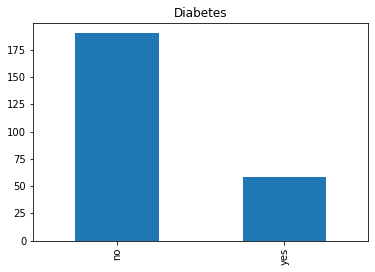

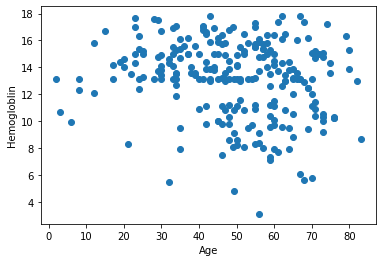

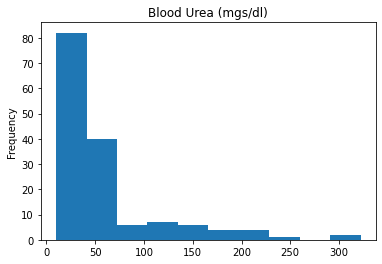

In [3]:
########################
# Inicio do seu codigo #
########################

# 1
df['diabetes_mellitus'].value_counts().plot(kind='bar')
plt.title('Diabetes')
plt.show()

# 2

plt.scatter(df['age'], df['hemogloblin'])
plt.ylabel('Hemogloblin')
plt.xlabel('Age')
plt.show()

# 3
age_30_60 = ((df['age'] >= 30) & (df['age'] <= 60))
df['blood_urea'][age_30_60].plot.hist()
plt.title('Blood Urea (mgs/dl)')
plt.show()

########################
#   Fim do seu codigo  #
########################

## Questão 3 (2.5 pts)

Enunciado

Responda às seguintes perguntas sobre o conjunto de dados:
1. Quantas pessoas possuem pressão sanguínea (nome original: `bp`) entre 80 e 90 e apetite ruim (nome original: `appet`)?
1. Quantas pessoas com idade (nome original: `age`) igual ou maior que 40 possuem doença (nome original: `classification`)?
1. Qual a idade média das pessoas com anemia (nome original: `ane`) e com contagem de glóbulos brancos (nome original: `wc`) maior ou igual a 12.000?
1. Quantas pessoas com hipertensão (nome original: `htn`) possuem uma contagem de glóbulos vermelhos (nome original: `rbc`) normal?
1. Qual a média dos atributos blood urea (nome original: `bu`) , sodium (nome original: `sod`) e potassium (nome original: `pot`), para pessoas **com e sem** doença arterial coronária (nome original: `cad`)?

In [4]:
########################
# Inicio do seu codigo #
########################

# 1
bp_appet = df[((df['blood_pressure'] >= 80) & (df['blood_pressure'] <= 90)) & (df['appetite'] == 'poor')].shape[0]
print(f'{bp_appet} pessoas possuem pressão sanguínea entre 80 e 90 e apetite ruim.')
print()

# 2
age_classification = df[(df['age'] >= 40) & (df['classification'] == 'ckd')].shape[0]
print(f'{age_classification} pessoas com idade igual ou maior que 40 possuem doença no rim.')
print()

# 3
ane_wc = (df['anemia'] == 'yes') & (df['white_blood_cell_count'] >= 12000)
avg_age = round(df['age'][ane_wc].mean(), 2)
print(f'{avg_age} é a idade média das pessoas com anemia e com contagem de glóbulos brancos maior ou igual a 12.000.')
print()

# 4
ane_wc = df[(df['hypertension'] == 'yes') & (df['red_blood_cells'] == 'normal')].shape[0]
print(f'{ane_wc} pessoas com hipertensão possuem uma contagem de glóbulos vermelhos normal.')
print()

# 5
has_disease = (df['coronary_artery_disease'] == 'yes')
no_disease = (df['coronary_artery_disease'] == 'no')

print(f"Médias das pessoas com doença arterial coronária:\n{df[['blood_urea', 'sodium', 'potassium']][has_disease].mean()}")
print()
print(f"Médias das pessoas sem doença arterial coronária:\n{df[['blood_urea', 'sodium', 'potassium']][no_disease].mean()}")
print()
print(f"Médias de todas as pessoas:\n{df[['blood_urea', 'sodium', 'potassium']].mean()}")

########################
#   Fim do seu codigo  #
########################

17 pessoas possuem pressão sanguínea entre 80 e 90 e apetite ruim.

91 pessoas com idade igual ou maior que 40 possuem doença no rim.

56.44 é a idade média das pessoas com anemia e com contagem de glóbulos brancos maior ou igual a 12.000.

41 pessoas com hipertensão possuem uma contagem de glóbulos vermelhos normal.

Médias das pessoas com doença arterial coronária:
blood_urea    111.205282
sodium        133.146922
potassium       4.590616
dtype: float64

Médias das pessoas sem doença arterial coronária:
blood_urea     53.966136
sodium        138.891453
potassium       4.751493
dtype: float64

Médias de todas as pessoas:
blood_urea     57.889787
sodium        138.497674
potassium       4.740465
dtype: float64


## Questão 4 (3.0 pts)

Realize as seguintes operações para treinar um modelo de classificação:
1. Substitua os valores das variáveis categóricas para valores numéricos da seguinte forma:

|Atributo(s)|Substituições|
|:--|:--|
|`htn`, `dm`, `cad`, `pe`, `ane`|`no`: 0<br>`yes`: 1|
|`rbc`, `pc`|`normal`: 0<br>`abnormal`: 1|
|`pcc`, `ba`|`notpresent`: 0<br>`present`: 1|
|`appet`|`poor`: 0<br>`good`: 1|
|`classification`|`notckd`: 0<br>`ckd`: 1|

2. Separe as colunas dos atributos (features) da coluna de anotação (label)
1. Separe o conjunto de dados em conjuntos de treino e teste, usando uma proporção de 70% para treino e 30% para teste.
1. Normalize os atributos utilizando a estratégia `MinMaxScaler` do Scikit-Learn (não se esqueça de normalizar os dados de teste também!).
1. Treine um modelo de classificação k-NN, com `k=5`.
1. Avalie o desempenho do modelo utilizando os dados de teste e a medida `accuracy_score`.

In [5]:
########################
# Inicio do seu codigo #
########################

# 1
df[cat_cols] = df[cat_cols].astype('category')
# print(df[cat_cols].nunique())
# print(df['classification'].value_counts())

df[cat_cols] = df[cat_cols].replace({'no': 0, 'normal': 0, 'notpresent': 0, 'poor': 0, 'notckd': 0, \
                       'yes': 1, 'abnormal': 1, 'present': 1, 'good': 1, 'ckd': 1})

print_dataframe(df.head())

# 2
df = pd.get_dummies(df, columns=remove_cols)
X = df.drop('classification', axis=1)
y = df['classification']

print_dataframe(df.head())

# 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# 4
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# 6
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy*100:.2f}%')

########################
#   Fim do seu codigo  #
########################

,age,blood_pressure,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemogloblin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
2,62.0,80.000000,2.0,3.0,0,0,0,0,423.0,53.0,1.8,138.497674,4.740465,9.6,31.0,7500.0,4.40201,0,1,0,0,0,1,1
3,48.0,70.000000,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.00000,1,0,0,0,1,1,1
4,51.0,80.000000,2.0,0.0,0,0,0,0,106.0,26.0,1.4,138.497674,4.740465,11.6,35.0,7300.0,4.00000,0,0,0,1,0,0,1
7,24.0,75.020747,2.0,4.0,0,1,0,0,410.0,31.0,1.1,138.497674,4.740465,12.4,44.0,6900.0,5.00000,0,1,0,1,1,0,1
8,52.0,100.000000,3.0,0.0,0,1,1,0,138.0,60.0,1.9,138.497674,4.740465,10.8,33.0,9600.0,4.00000,1,1,0,1,0,1,1


,age,blood_pressure,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemogloblin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification,albumin_0.0,albumin_1.0,albumin_2.0,albumin_3.0,albumin_4.0,albumin_5.0,sugar_0.0,sugar_1.0,sugar_2.0,sugar_3.0,sugar_4.0,sugar_5.0
2,62.0,80.000000,0,0,0,0,423.0,53.0,1.8,138.497674,4.740465,9.6,31.0,7500.0,4.40201,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
3,48.0,70.000000,0,1,1,0,117.0,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.00000,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0
4,51.0,80.000000,0,0,0,0,106.0,26.0,1.4,138.497674,4.740465,11.6,35.0,7300.0,4.00000,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
7,24.0,75.020747,0,1,0,0,410.0,31.0,1.1,138.497674,4.740465,12.4,44.0,6900.0,5.00000,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
8,52.0,100.000000,0,1,1,0,138.0,60.0,1.9,138.497674,4.740465,10.8,33.0,9600.0,4.00000,1,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0


Acurácia: 94.67%


## Questão 5 - Bônus (1.0 pts)

Dado o processamento realizado na questão anterior, treine um conjunto de modelos de classificação k-NN com `k` variando de 1 a 25 (de 1 em 1) e avalie os desempenhos dos modelos utilizando as métricas `accuracy_score` e `f1_score`. Em seguida, realize a plotagem dos valores destas métricas como um gráfico de linha (ambas as métricas no mesmo gráfico, eixo X representando valores de `k` e eixo Y representando os valores das métricas).

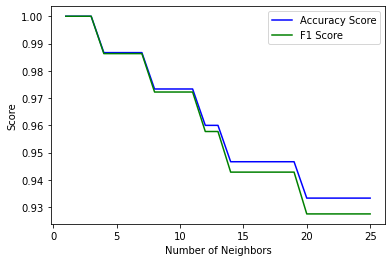

In [6]:
########################
# Inicio do seu codigo #
########################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 1
accs = []
f1s = []
range_array = [x for x in range(1, 26)]

for k in range(1, 26):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)
    f1 = f1_score(y_test, y_pred)
    f1s.append(f1)
    
df_new = pd.DataFrame({'accuracy': accs, 'f1': f1s})
# print_dataframe(df_new)

# 2
fig, ax = plt.subplots()

ax.plot(range_array, df_new['accuracy'], label='Accuracy Score', color='blue')
ax.plot(range_array, df_new['f1'], label='F1 Score', color='green')
ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('Score')
ax.legend()

plt.show()
    
########################
#   Fim do seu codigo  #
########################